In [5]:
%run '../../Initialisation_Notebook/Initialize.ipynb'

Initialization done, Notebook was last run on: 15/07/2020 at 15:48:53


In [2]:
df_0vbb = pd.read_hdf('0vbb_simulation_uniform_all_tpc.h5', key='df')

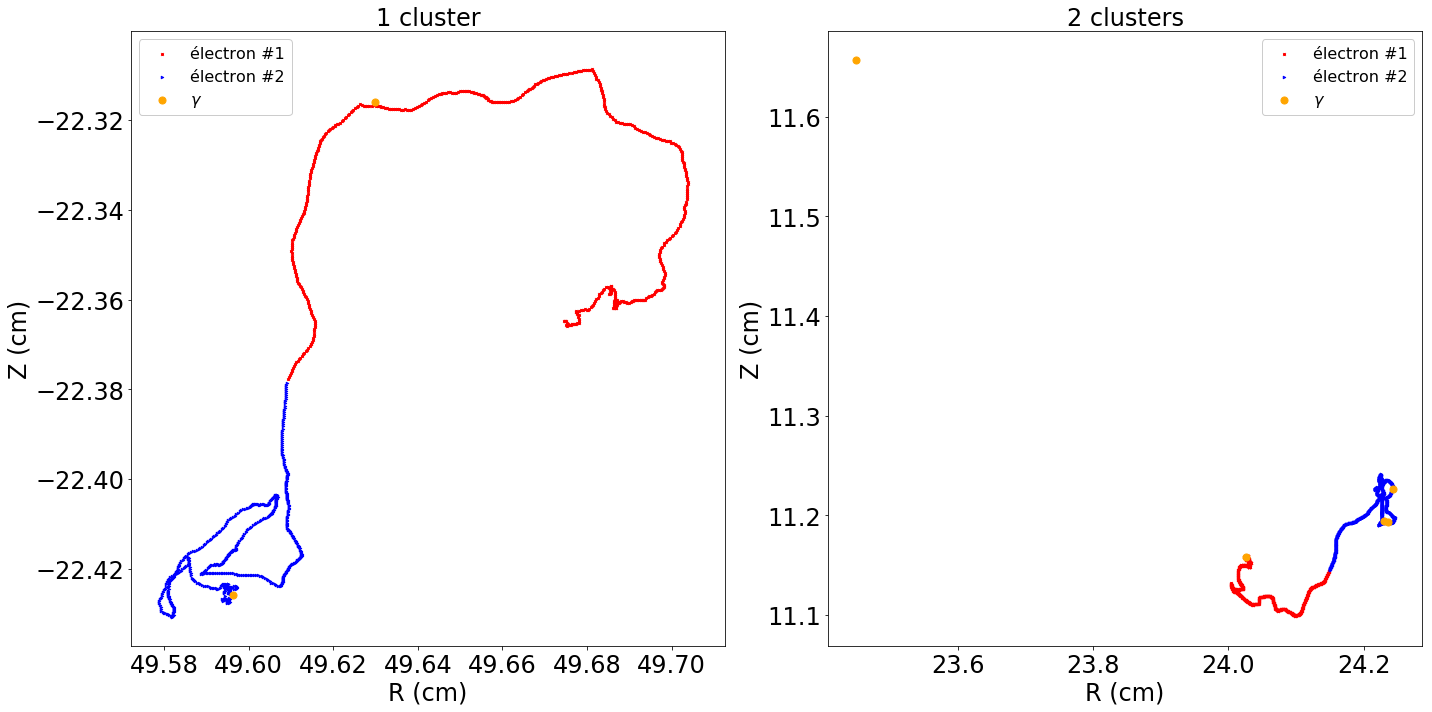

In [3]:
test = df_0vbb
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1)#, projection='3d')


plt.title('1 cluster')

event=test[test.eventID== 3]

electron1= event[(event.trackID==1)]#|(event.parentID==1)]
electron2= event[(event.trackID==2)]#|(event.parentID==2)]
gammas = event[(event.typeDepInt==2)]#|(event.processDepInt==2)]
other = event[(event.trackID>2)&(event.typeDepInt==1)]

ax.scatter(np.sqrt((electron1.xDep/10)**2+(electron1.yDep/10)**2),
            electron1.zDep/10,
            marker= 'x', s = 6, c='red', label='électron #1')

ax.scatter(np.sqrt((electron2.xDep/10)**2+(electron2.yDep/10)**2),
            electron2.zDep/10,
            #electron2.edep*1000, 
            marker= '>', s = 6, c='blue',  label='électron #2')

ax.scatter(np.sqrt((gammas.xDep/10)**2+(gammas.yDep/10)**2),
            gammas.zDep/10,
            marker= 'o', s = 50, c='orange',label=r'$\gamma$')

ax.set_xlabel('R (cm)')
ax.set_ylabel('Z (cm)')
#ax.set_zlabel('Z (cm)')

#ax.set_xlim(-31.7,-31.6)
#ax.set_ylim(-38.3,-38.2)

plt.legend(fontsize=16)

ax = fig.add_subplot(1, 2, 2)#, projection='3d')



plt.title('2 clusters')

event=test[test.eventID== 7]


electron1= event[(event.trackID==1)]#|(event.parentID==1)]
electron2= event[(event.trackID==2)]#|(event.parentID==2)]
gammas = event[(event.typeDepInt==2)]#|(event.processDepInt==2)]
other = event[(event.trackID>2)&(event.typeDepInt==1)]

ax.scatter(np.sqrt((electron1.xDep/10)**2+(electron1.yDep/10)**2),
            electron1.zDep/10,
            marker= 'x', s = 6, c='red', label='électron #1')

ax.scatter(np.sqrt((electron2.xDep/10)**2+(electron2.yDep/10)**2),
            electron2.zDep/10,
            #electron2.edep*1000, 
            marker= '>', s = 6, c='blue',  label='électron #2')

ax.scatter(np.sqrt((gammas.xDep/10)**2+(gammas.yDep/10)**2),
            gammas.zDep/10,
            marker= 'o', s = 50, c='orange',label=r'$\gamma$')


ax.set_xlabel('R (cm)')
ax.set_ylabel('Z (cm)')
#ax.set_xlim(-13,-12.1)
 #ax.dist = 2

plt.tight_layout()
plt.legend(fontsize=16)

plt.savefig('simulations_geant4_ex.png')

plt.show()




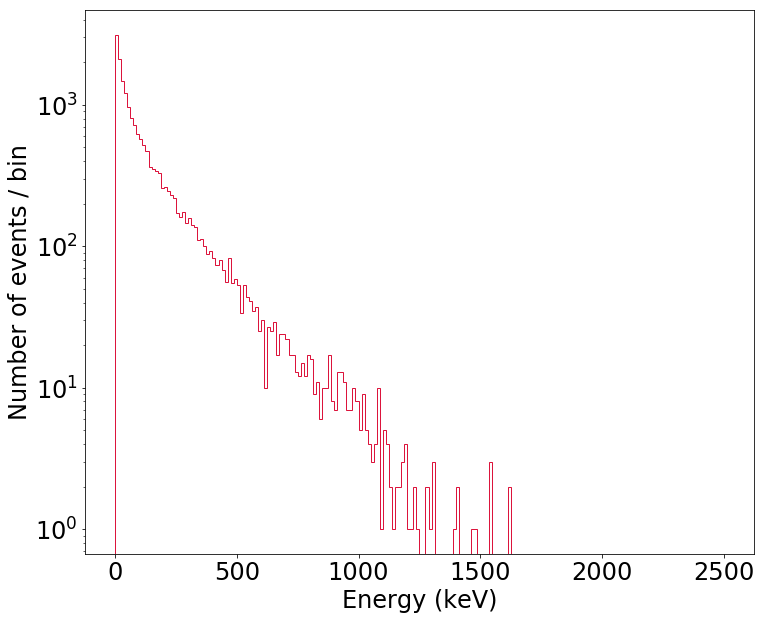

In [7]:
edep_brem_0vbb=np.loadtxt('0vbb_simulation_brem_spectrum.csv',delimiter=',')

plt.hist(np.multiply(edep_brem_0vbb,1), bins=200, range=[0,2500], color='crimson',
         histtype='step')


plt.yscale('log')

plt.xlabel('Energy (keV)')
plt.ylabel("Number of events / bin")

plt.savefig('simulation_0vbb_ebrem_spectrum.png')

plt.show()

In [8]:
df_cluster = pd.read_hdf('0vbb_simulation_pre_clustering_3d.h5', key='df')

In [9]:
len(df_cluster[df_cluster.nb_cluster==1].event_id.unique())/len(df_cluster.event_id.unique())*100

30.245

In [10]:
df_cluster_z_clustering = pd.read_hdf('0vbb_simulation_z_clustering_preclust3d.h5', key='df')

In [11]:
len(df_cluster_z_clustering[df_cluster_z_clustering.nb_cluster==1].event_id.unique())/len(df_cluster_z_clustering.event_id.unique())*100

87.225

In [12]:
nph = []
nel = []
sim = df_cluster_z_clustering[(df_cluster_z_clustering.nb_cluster==1)]
for i in range(len(sim)):
    event = sim[sim.event_id==i]
    for j in range(len(event)):   
        nphsum=sum(event.nph.values[j])
        nelsum=sum(event.nel.values[j])
        
        nph.append(nphsum)
        nel.append(nelsum) 

In [13]:
nph_ms = []
nel_ms = []
sim = df_cluster_z_clustering[(df_cluster_z_clustering.nb_cluster>1)]
for i in range(len(sim)):
    event = sim[sim.event_id==i]
    for j in range(len(event)):
        for k in range(len(event.nph.values[j])):    
            nph_ms.append(event.nph.values[j][k])
            nel_ms.append(event.nel.values[j][k]) 

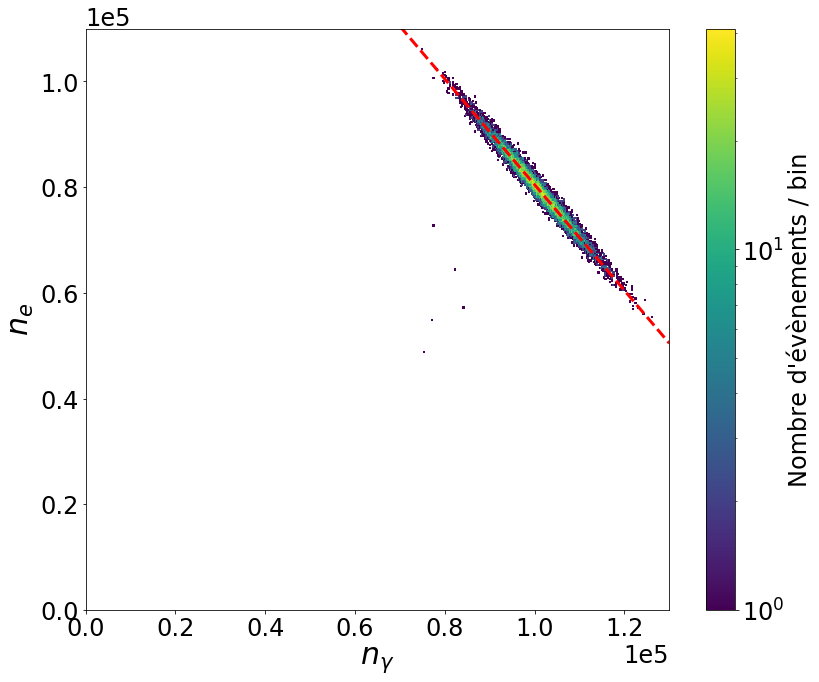

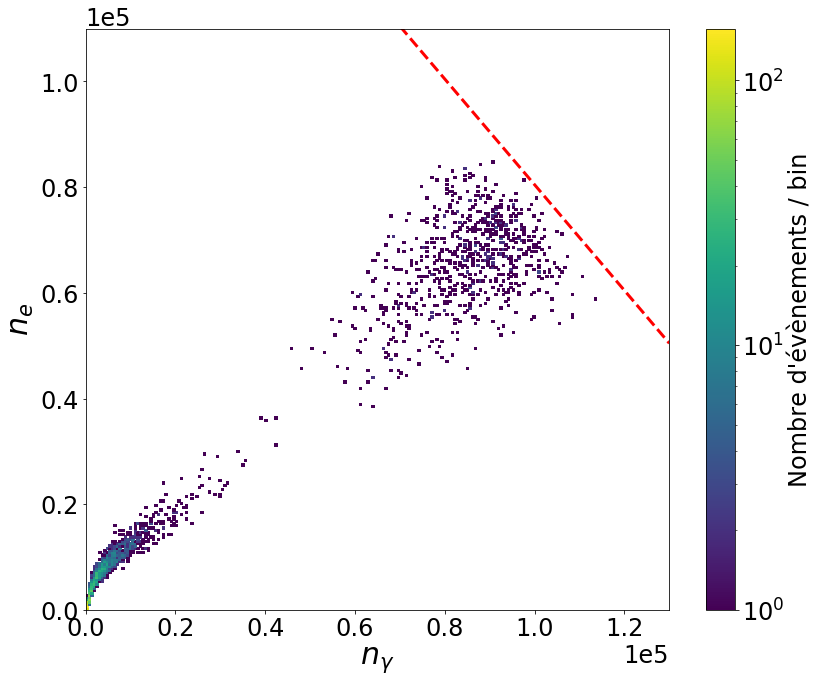

In [14]:
# plt.hist2d(df_cluster_z_clustering.nph/100, 
#            df_cluster_z_clustering.nel/100, norm=LogNorm(), bins=(200,200), cmap='viridis', alpha=1)

plt.hist2d(nph, nel,
            norm=LogNorm(), bins=(200,200), cmap='viridis', alpha=1)
plt.xlabel(r'$n_{\gamma}$',fontsize=30)
plt.ylabel(r'$n_{e} $',fontsize=30)
plt.colorbar(label="Nombre d'évènements / bin")

plt.xlim(1,13e4)
plt.ylim(1,11e4)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()

plt.plot(np.arange(7e4,13e4), 2457.83/(13.62e-3) - np.arange(7e4,13e4), color='r', lw=3, ls='dashed')

plt.savefig('simulation_0vbb_nest_ne_nph.png')

plt.show()

# plt.hist2d(df_cluster_z_clustering.nph/100, 
#            df_cluster_z_clustering.nel/100, norm=LogNorm(), bins=(200,200), cmap='viridis', alpha=1)

plt.hist2d(nph_ms, nel_ms,
            norm=LogNorm(), bins=(200,200), cmap='viridis', alpha=1)
plt.xlabel(r'$n_{\gamma}$',fontsize=30)
plt.ylabel(r'$n_{e} $',fontsize=30)
plt.colorbar(label="Nombre d'évènements / bin")
plt.xlim(1,13e4)
plt.ylim(1,11e4)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()

plt.plot(np.arange(7e4,13e4), 2457.83/(13.62e-3) - np.arange(7e4,13e4), color='r', lw=3, ls='dashed')

plt.savefig('simulation_ms_0vbb_nest_ne_nph.png')

plt.show()



